In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('POWERGRID.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3359 non-null   object 
 1   Symbol              3359 non-null   object 
 2   Series              3359 non-null   object 
 3   Prev Close          3359 non-null   float64
 4   Open                3359 non-null   float64
 5   High                3359 non-null   float64
 6   Low                 3359 non-null   float64
 7   Last                3359 non-null   float64
 8   Close               3359 non-null   float64
 9   VWAP                3359 non-null   float64
 10  Volume              3359 non-null   int64  
 11  Turnover            3359 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3359 non-null   int64  
 14  %Deliverble         3359 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 393.8

In [23]:
df.head()

,Open,D+1 OPEN
Date,,
2007-10-05,89.8,104.0
2007-10-08,104.0,95.5
2007-10-09,95.5,104.6
2007-10-10,104.6,120.0
2007-10-11,120.0,112.0


In [8]:
df['Date']

0       2007-10-05
1       2007-10-08
2       2007-10-09
3       2007-10-10
4       2007-10-11
           ...    
3354    2021-04-26
3355    2021-04-27
3356    2021-04-28
3357    2021-04-29
3358    2021-04-30
Name: Date, Length: 3359, dtype: object

In [9]:
#trasoformo il datatime da object a float
df.index = pd.to_datetime(df['Date'])
df = df.sort_index()

In [10]:
df.index.dayofweek

Int64Index([4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
            ...
            4, 0, 1, 3, 4, 0, 1, 2, 3, 4],
           dtype='int64', name='Date', length=3359)

In [11]:
df.index.month

Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
           dtype='int64', name='Date', length=3359)

In [12]:
### si può anche cambiare la formattazione della data (non è importante per ora saperlo gestire)
df.index.strftime('%a-%d-%m-%y')

Index(['Fri-05-10-07', 'Mon-08-10-07', 'Tue-09-10-07', 'Wed-10-10-07',
       'Thu-11-10-07', 'Fri-12-10-07', 'Mon-15-10-07', 'Tue-16-10-07',
       'Wed-17-10-07', 'Thu-18-10-07',
       ...
       'Fri-16-04-21', 'Mon-19-04-21', 'Tue-20-04-21', 'Thu-22-04-21',
       'Fri-23-04-21', 'Mon-26-04-21', 'Tue-27-04-21', 'Wed-28-04-21',
       'Thu-29-04-21', 'Fri-30-04-21'],
      dtype='object', name='Date', length=3359)

In [13]:
## resampling ('T':minute, 'D':day,'W':week, 'M':month, 'Y':year)
df.resample('W').agg(np.mean)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2007-10-07,52.00,89.800000,109.500000,83.150000,100.200000,100.600000,102.490000,4.810589e+08,4.930561e+15,NaN,1.813902e+08,0.377100
2007-10-14,103.06,107.220000,109.950000,100.040000,105.830000,105.670000,105.338000,5.816933e+07,6.102247e+14,NaN,1.777603e+07,0.314960
2007-10-21,124.90,122.660000,134.390000,117.220000,127.820000,128.480000,128.008000,7.224640e+07,9.380818e+14,NaN,1.602343e+07,0.248900
2007-10-28,134.78,135.030000,140.080000,129.950000,136.820000,136.610000,137.162000,3.451456e+07,4.726923e+14,NaN,8.989736e+06,0.267160
2007-11-04,145.45,146.130000,151.090000,143.150000,147.050000,147.130000,147.874000,2.822277e+07,4.170409e+14,NaN,7.645202e+06,0.272200
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-04,217.20,217.816667,221.383333,214.933333,217.983333,218.566667,218.163333,1.598482e+07,3.508195e+14,107044.333333,7.534949e+06,0.443867
2021-04-11,212.32,212.530000,215.830000,209.580000,210.590000,210.240000,212.152000,1.067291e+07,2.265654e+14,80181.800000,4.834129e+06,0.462480
2021-04-18,206.50,206.800000,210.562500,203.812500,207.000000,206.887500,207.100000,9.921881e+06,2.055497e+14,74636.000000,4.672485e+06,0.473800


In [14]:
df.loc['2012-01-10':'2012-01-15']

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2012-01-10,2012-01-10,POWERGRID,EQ,101.40,101.05,103.3,101.05,102.55,102.60,102.22,1808993,1.849095e+13,16318.0,1127458,0.6233
2012-01-11,2012-01-11,POWERGRID,EQ,102.60,102.70,102.7,99.90,100.15,100.20,100.86,2462327,2.483449e+13,24837.0,1710164,0.6945
2012-01-12,2012-01-12,POWERGRID,EQ,100.20,101.40,101.4,99.45,100.35,100.55,100.48,2296432,2.307490e+13,16863.0,1421468,0.6190
2012-01-13,2012-01-13,POWERGRID,EQ,100.55,100.60,102.2,100.50,102.00,101.95,101.57,3243660,3.294482e+13,15468.0,2484933,0.7661


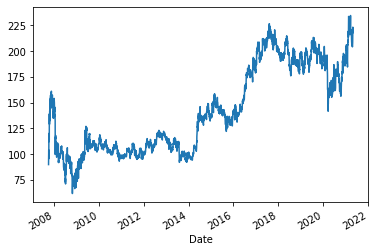

In [15]:
df['Open'].plot()
plt.show()

In [16]:
#Il nostro obiettivo è quello di prevedere l'Open del giorno successivo a partire dall'Open del giorno corrente
df['D+1 OPEN'] = df['Open'].shift(-1).copy()

In [17]:
df.isna().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                903
Deliverable Volume      0
%Deliverble             0
D+1 OPEN                1
dtype: int64

In [19]:
df = df[["Open","D+1 OPEN"]].dropna()  #cosi elimino solo il nan in D+1 OPEN

In [20]:
df


,Open,D+1 OPEN
Date,,
2007-10-05,89.80,104.00
2007-10-08,104.00,95.50
2007-10-09,95.50,104.60
2007-10-10,104.60,120.00
2007-10-11,120.00,112.00
...,...,...
2021-04-23,204.30,208.20
2021-04-26,208.20,216.05
2021-04-27,216.05,218.80


In [21]:
df.isna().sum()  #controllo che non ci siano nan

Open        0
D+1 OPEN    0
dtype: int64

In [22]:
from pandas.io.formats.info import DataFrameTableBuilderVerbose
DataFrameTableBuilderVerbose

pandas.io.formats.info.DataFrameTableBuilderVerbose

In [24]:
### .inserisco le date direttamente cosi so dove inizia il test
train_df = df.loc[:'2018-12-31'].copy()
test_df = df.loc['2019-01-01':].copy()

In [45]:
features = ['Open',"High","Low","Last"]
X_train = train_df[features].copy()
X_test = test_df[features].copy()

KeyError: ignored

In [26]:
target_name = 'D+1 OPEN'
y_train = train_df[target_name].copy()
y_test = test_df[target_name].copy()

In [27]:
X_train

,Open
Date,
2007-10-05,89.80
2007-10-08,104.00
2007-10-09,95.50
2007-10-10,104.60
2007-10-11,120.00
...,...
2018-12-24,197.00
2018-12-26,193.60
2018-12-27,195.05


In [28]:
y_train

Date
2007-10-05    104.00
2007-10-08     95.50
2007-10-09    104.60
2007-10-10    120.00
2007-10-11    112.00
               ...  
2018-12-24    193.60
2018-12-26    195.05
2018-12-27    197.50
2018-12-28    196.70
2018-12-31    197.45
Name: D+1 OPEN, Length: 2782, dtype: float64

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

model = RandomForestRegressor()
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [30]:
print(r2_train)
print(r2_test)

0.9973162958264953
0.9323736038592539


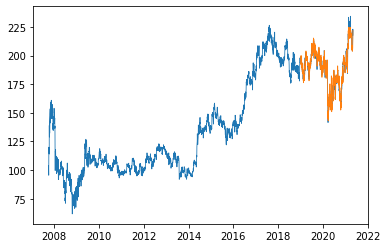

In [31]:
plt.plot(df[target_name], linewidth=0.8)
plt.plot(pd.Series(test_preds, y_test.index), linewidth=0.8),
plt.show()

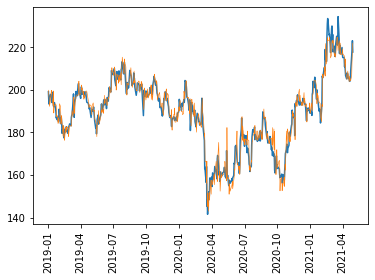

In [32]:

plt.plot(y_test)
plt.plot(pd.Series(test_preds, y_test.index), linewidth=0.6)
plt.xticks(rotation=90)
plt.show()

In [33]:
test_df['preds'] = pd.Series(test_preds, index=y_test.index)

In [34]:
test_df['target_direction'] = np.sign(test_df['D+1 OPEN']-test_df['Open'])
test_df

,Open,D+1 OPEN,preds,target_direction
Date,,,,
2019-01-01,197.45,199.10,199.812843,1.0
2019-01-02,199.10,194.90,197.601317,-1.0
2019-01-03,194.90,193.30,196.318033,-1.0
2019-01-04,193.30,196.10,192.238000,1.0
2019-01-07,196.10,197.90,195.586147,1.0
...,...,...,...,...
2021-04-23,204.30,208.20,204.489150,1.0
2021-04-26,208.20,216.05,206.764133,1.0
2021-04-27,216.05,218.80,214.169500,1.0


In [38]:
test_df['pred_direction'] = np.sign(test_df['preds']-test_df['Open'])
test_df

,Open,D+1 OPEN,preds,target_direction,pred_direction
Date,,,,,
2019-01-01,197.45,199.10,199.812843,1.0,1.0
2019-01-02,199.10,194.90,197.601317,-1.0,-1.0
2019-01-03,194.90,193.30,196.318033,-1.0,1.0
2019-01-04,193.30,196.10,192.238000,1.0,-1.0
2019-01-07,196.10,197.90,195.586147,1.0,-1.0
...,...,...,...,...,...
2021-04-23,204.30,208.20,204.489150,1.0,1.0
2021-04-26,208.20,216.05,206.764133,1.0,-1.0
2021-04-27,216.05,218.80,214.169500,1.0,-1.0


In [37]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_df['target_direction'],test_df['pred_direction']))

0.4600694444444444


In [39]:
## preparo i dati per Prophet (deve essere un DataFrame con colonne ['ds','y'])

df = pd.read_csv('POWERGRID.csv')
df.index = pd.to_datetime(df['Date'])
df = df.sort_index()

df['ds'] = df.index
df['y'] = df['Open'].copy()

train_df = df[['ds','y']].loc[:'2018-12-31'].copy()
test_df = df[['ds','y']].loc['2019-01-01':].copy()

from fbprophet import Prophet
model = Prophet(weekly_seasonality=False) # the Prophet class (model)
model.fit(train_df) # fit the model using all data

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
test_preds_df = model.predict(test_df)

In [41]:
test_preds_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,199.284255,188.336992,209.117100,199.284255,199.284255,-0.495659,-0.495659,-0.495659,-0.495659,-0.495659,-0.495659,0.0,0.0,0.0,198.788597
1,2019-01-02,199.289280,188.989192,209.655310,199.289280,199.289280,-0.319576,-0.319576,-0.319576,-0.319576,-0.319576,-0.319576,0.0,0.0,0.0,198.969705
2,2019-01-03,199.294305,189.023165,210.563348,199.294305,199.294305,-0.163597,-0.163597,-0.163597,-0.163597,-0.163597,-0.163597,0.0,0.0,0.0,199.130708
3,2019-01-04,199.299331,189.286422,209.076270,199.299331,199.299331,-0.029133,-0.029133,-0.029133,-0.029133,-0.029133,-0.029133,0.0,0.0,0.0,199.270198
4,2019-01-07,199.314406,189.513661,210.551252,199.314406,199.314406,0.237567,0.237567,0.237567,0.237567,0.237567,0.237567,0.0,0.0,0.0,199.551973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2021-04-26,203.535427,86.346497,327.547872,83.166926,327.510900,2.436420,2.436420,2.436420,2.436420,2.436420,2.436420,0.0,0.0,0.0,205.971847
573,2021-04-27,203.540452,86.965978,331.753384,82.708604,327.609251,2.381942,2.381942,2.381942,2.381942,2.381942,2.381942,0.0,0.0,0.0,205.922394
574,2021-04-28,203.545477,81.657678,328.386629,82.250281,327.707601,2.312973,2.312973,2.312973,2.312973,2.312973,2.312973,0.0,0.0,0.0,205.858450
575,2021-04-29,203.550502,86.450865,332.508887,81.791959,327.805952,2.233029,2.233029,2.233029,2.233029,2.233029,2.233029,0.0,0.0,0.0,205.783531


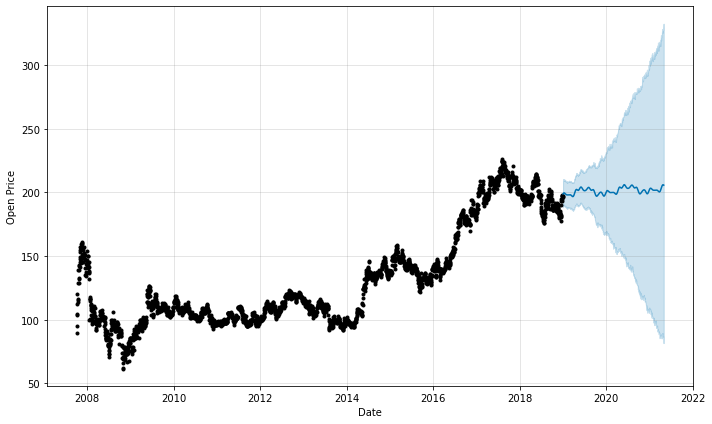

In [42]:
model.plot(test_preds_df)
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

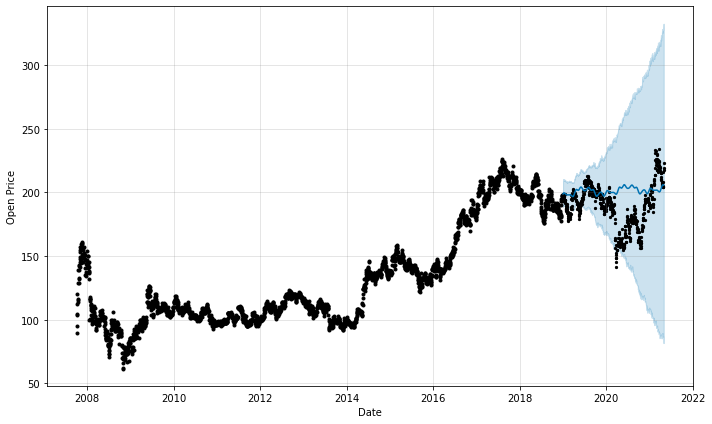

In [43]:
model.plot(test_preds_df)
plt.scatter(x=test_df.index, y=test_df['y'], s=5, c='k')

plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()